# GPU

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
print(gpu_info)

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



# TPU

In [2]:
import os
assert os.environ['COLAB_TPU_ADDR'], 'Make sure to select TPU from Edit > Notebook settings > Hardware accelerator'

# CFG

In [3]:
CONFIG_NAME = 'config10.yml'
TITLE = '10t-efficientnet_b4_ns-TPU'

In [4]:
! git clone https://github.com/raijin0704/cassava.git
# ====================================================
# CFG
# ====================================================
import yaml

CONFIG_PATH = f'./cassava/config/{CONFIG_NAME}'
with open(CONFIG_PATH) as f:
    config = yaml.load(f)

INFO = config['info']
TAG = config['tag']
CFG = config['cfg']

CFG['train'] = True
CFG['inference'] = False

CFG['debug'] = True

if CFG['debug']:
    CFG['epochs'] = 1


assert INFO['TITLE'] == TITLE

Cloning into 'cassava'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 71 (delta 45), reused 10 (delta 5), pack-reused 0
Unpacking objects: 100% (71/71), done.


# colab & kaggle notebookでの環境面の処理

## colab

In [5]:
def _colab_kaggle_authority():
    from googleapiclient.discovery import build
    import io, os
    from googleapiclient.http import MediaIoBaseDownload

    drive_service = build('drive', 'v3')
    results = drive_service.files().list(
            q="name = 'kaggle.json'", fields="files(id)").execute()
    kaggle_api_key = results.get('files', [])

    filename = "/root/.kaggle/kaggle.json"
    os.makedirs(os.path.dirname(filename), exist_ok=True)

    request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
    fh = io.FileIO(filename, 'wb')
    downloader = MediaIoBaseDownload(fh, request)
    done = False
    while done is False:
        status, done = downloader.next_chunk()
        print("Download %d%%." % int(status.progress() * 100))
    os.chmod(filename, 600)


def _install_apex():
    import os
    import subprocess
    import sys
    # import time
    subprocess.run('git clone https://github.com/NVIDIA/apex'.split(' '))
    # time.sleep(10)
    os.chdir('apex')
    subprocess.run('pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" .'.split(' '))
    os.chdir('..')


def process_colab():
    import subprocess
    
    # ドライブのマウント
    from google.colab import drive
    drive.mount('/content/drive')

    # Google Cloudの権限設定
    from google.colab import auth
    auth.authenticate_user()

    # kaggle設定
    # _colab_kaggle_authority()
    # subprocess.run('pip install --upgrade --force-reinstall --no-deps kaggle'.split(' '))

    # ライブラリ関係
    subprocess.run('pip install --upgrade opencv-python'.split(' '))
    subprocess.run('pip install --upgrade albumentations'.split(' '))
    subprocess.run('pip install timm'.split(' '))
    # if CFG['apex']:
    #     print('installing apex')
    #     _install_apex()
    #     print('done')

    # 各種pathの設定
    # DATA_PATH = '/content/drive/Shareddrives/便利用/kaggle/cassava/input/'
    DATA_PATH = '/content/input'
    OUTPUT_DIR = './output/'
    NOTEBOOK_PATH = f'/content/drive/Shareddrives/便利用/kaggle/cassava/notebook/{TITLE}.ipynb'

    return DATA_PATH, OUTPUT_DIR, NOTEBOOK_PATH

## kaggle notebook

In [6]:
def _kaggle_gcp_authority():
    from kaggle_secrets import UserSecretsClient
    user_secrets = UserSecretsClient()
    user_credential = user_secrets.get_gcloud_credential()
    user_secrets.set_tensorflow_credential(user_credential)

def process_kaggle():
    # GCP設定
    _kaggle_gcp_authority()

    # 各種pathの設定
    DATA_PATH = '../input/cassava-leaf-disease-classification/'
    OUTPUT_DIR = './'
    NOTEBOOK_PATH = './__notebook__.ipynb'
    # system path
    import sys
    sys.path.append('../input/pytorch-image-models/pytorch-image-models-master')

    return DATA_PATH, OUTPUT_DIR, NOTEBOOK_PATH

## 共通

In [7]:
def process_common():
    # ライブラリ関係
    import os
    import subprocess
    subprocess.run('pip install mlflow'.split(' '))
    if os.environ['COLAB_TPU_ADDR']:
        subprocess.run('pip install cloud-tpu-client==0.10 https://storage.googleapis.com/tpu-pytorch/wheels/torch_xla-1.7-cp36-cp36m-linux_x86_64.whl'.split(' '))

    # 環境変数
    import os
    os.environ["GCLOUD_PROJECT"] = INFO['PROJECT_ID']

In [8]:
try:
    from google.colab import auth
except ImportError:
    DATA_PATH, OUTPUT_DIR, NOTEBOOK_PATH = process_kaggle()
else:
    DATA_PATH, OUTPUT_DIR, NOTEBOOK_PATH = process_colab()
finally:
    process_common()

Mounted at /content/drive


In [9]:
# !pip install cloud-tpu-client==0.10 https://storage.googleapis.com/tpu-pytorch/wheels/torch_xla-1.7-cp36-cp36m-linux_x86_64.whl

In [10]:
!rm -r /content/input

rm: cannot remove '/content/input': No such file or directory


In [11]:
import os
try:
    from google.colab import auth
except ImportError:
    pass
else:
    ! cp /content/drive/Shareddrives/便利用/kaggle/cassava/input.zip /content/input.zip
    ! unzip input.zip
    ! rm input.zip
train_num = len(os.listdir(DATA_PATH+"/train_images"))
assert train_num == 21397

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: input/train_images/1137739472.jpg  
  inflating: input/train_images/441313044.jpg  
  inflating: input/train_images/982733151.jpg  
  inflating: input/train_images/3643480526.jpg  
  inflating: input/train_images/2440664696.jpg  
  inflating: input/train_images/370523815.jpg  
  inflating: input/train_images/1125560878.jpg  
  inflating: input/train_images/3303165486.jpg  
  inflating: input/train_images/510873412.jpg  
  inflating: input/train_images/550429661.jpg  
  inflating: input/train_images/1127352598.jpg  
  inflating: input/train_images/3767196717.jpg  
  inflating: input/train_images/25671501.jpg  
  inflating: input/train_images/2296550892.jpg  
  inflating: input/train_images/754482252.jpg  
  inflating: input/train_images/3714169299.jpg  
  inflating: input/train_images/127776052.jpg  
  inflating: input/train_images/3761357668.jpg  
  inflating: input/train_images/996534381.jpg  
  inflating: input/train_images/255701322.jpg  

# install apex

In [12]:
if CFG['apex']:
    try:
        import apex
    except Exception:
        ! git clone https://github.com/NVIDIA/apex.git
        % cd apex
        !pip install --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" .
        %cd ..

# Library

In [13]:
# ====================================================
# Library
# ====================================================
import os
import datetime
import math
import time
import random
import glob
import shutil
from pathlib import Path
from contextlib import contextmanager
from collections import defaultdict, Counter

import scipy as sp
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

from tqdm.auto import tqdm
from functools import partial

import cv2
from PIL import Image

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam, SGD
import torchvision.models as models
from torch.nn.parameter import Parameter
from torch.utils.data import DataLoader, Dataset
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts, CosineAnnealingLR, ReduceLROnPlateau

from albumentations import (
    Compose, OneOf, Normalize, Resize, RandomResizedCrop, RandomCrop, HorizontalFlip, VerticalFlip, 
    RandomBrightness, RandomContrast, RandomBrightnessContrast, Rotate, ShiftScaleRotate, Cutout, 
    IAAAdditiveGaussianNoise, Transpose
    )
from albumentations.pytorch import ToTensorV2
from albumentations import ImageOnlyTransform

import timm
import mlflow

import warnings 
warnings.filterwarnings('ignore')

if CFG['apex']:
    from apex import amp

if os.environ['COLAB_TPU_ADDR']:
    import torch_xla.core.xla_model as xm
    import torch_xla.distributed.parallel_loader as pl
    import torch_xla.distributed.xla_multiprocessing as xmp
    import torch_xla.utils.serialization as xser

if CFG['debug']:
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
elif os.environ['COLAB_TPU_ADDR']:
    device = xm.xla_device()
else:
    device = torch.device('cuda')
start_time = datetime.datetime.now()
start_time_str = start_time.strftime('%m%d%H%M')

# Directory settings

In [14]:
# ====================================================
# Directory settings
# ====================================================
if os.path.exists(OUTPUT_DIR):
    shutil.rmtree(OUTPUT_DIR)
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

# save basic files

In [15]:
# with open(f'{OUTPUT_DIR}/{start_time_str}_TAG.json', 'w') as f:
#     json.dump(TAG, f, indent=4)
    
# with open(f'{OUTPUT_DIR}/{start_time_str}_CFG.json', 'w') as f:
#     json.dump(CFG, f, indent=4)

import shutil
notebook_path = f'{OUTPUT_DIR}/{start_time_str}_{TITLE}.ipynb'
shutil.copy2(NOTEBOOK_PATH, notebook_path)

'./output//01120625_10t-efficientnet_b4_ns-TPU.ipynb'

# Data Loading

In [16]:
train = pd.read_csv(f'{DATA_PATH}/train.csv')
test = pd.read_csv(f'{DATA_PATH}/sample_submission.csv')
label_map = pd.read_json(f'{DATA_PATH}/label_num_to_disease_map.json', 
                         orient='index')

if CFG['debug']:
    train = train.sample(n=1000, random_state=CFG['seed']).reset_index(drop=True)

# Utils

In [17]:
# ====================================================
# Utils
# ====================================================
def get_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)


@contextmanager
def timer(name):
    t0 = time.time()
    LOGGER.info(f'[{name}] start')
    yield
    LOGGER.info(f'[{name}] done in {time.time() - t0:.0f} s.')


def init_logger(log_file=OUTPUT_DIR+'train.log'):
    from logging import getLogger, FileHandler,  Formatter,  StreamHandler
    from logging import INFO as INFO_
    logger = getLogger(__name__)
    logger.setLevel(INFO_)
    handler1 = StreamHandler()
    handler1.setFormatter(Formatter("%(message)s"))
    handler2 = FileHandler(filename=log_file)
    handler2.setFormatter(Formatter("%(message)s"))
    logger.addHandler(handler1)
    logger.addHandler(handler2)
    return logger

logger_path = OUTPUT_DIR+f'{start_time_str}_train.log'
LOGGER = init_logger(logger_path)


def seed_torch(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

seed_torch(seed=CFG['seed'])


class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, save_path='checkpoint.pt',
                 counter=0, best_score=None, save_latest_path=None):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            save_path (str): Directory for saving a model.
                             Default: "'checkpoint.pt'"
        """
        self.patience = patience
        self.verbose = verbose
        self.save_path = save_path
        self.counter = counter
        self.best_score = best_score
        self.save_latest_path = save_latest_path
        self.early_stop = False
        self.val_loss_min = np.Inf

    def __call__(self, val_loss, model, preds, epoch):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model, preds, epoch)
            self.save_latest(val_loss, model, preds, epoch, score)
        elif score >= self.best_score:
            self.counter = 0
            self.best_score = score
            self.save_checkpoint(val_loss, model, preds, epoch)
            self.save_latest(val_loss, model, preds, epoch, score)
        # nanになったら学習ストップ
        elif math.isnan(score):
            self.early_stop = True
        else:
            self.counter += 1
            if self.save_latest_path is not None:
                self.save_latest(val_loss, model, preds, epoch, score)
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True

    def save_checkpoint(self, val_loss, model, preds, epoch):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.10f} --> {val_loss:.10f}).  Saving model ...')
        torch.save({'model': model.state_dict(), 'preds': preds, 
                    'epoch' : epoch, 'best_score' : self.best_score, 'counter' : self.counter},
                   self.save_path)
        self.val_loss_min = val_loss

    def save_latest(self, val_loss, model, preds, epoch, score):
        '''Saves latest model.'''
        if os.environ['COLAB_TPU_ADDR']:
            xm.save({'model': model.state_dict(), 'preds': preds, 
                        'epoch' : epoch, 'score' : score, 'counter' : self.counter},
                    self.save_latest_path)
        else:
            torch.save({'model': model.state_dict(), 'preds': preds, 
                        'epoch' : epoch, 'score' : score, 'counter' : self.counter},
                    self.save_latest_path)
        self.val_loss_min = val_loss

# CV split

In [18]:
folds = train.copy()
Fold = StratifiedKFold(n_splits=CFG['n_fold'], shuffle=True, random_state=CFG['seed'])
for n, (train_index, val_index) in enumerate(Fold.split(folds, folds[CFG['target_col']])):
    folds.loc[val_index, 'fold'] = int(n)
folds['fold'] = folds['fold'].astype(int)
print(folds.groupby(['fold', CFG['target_col']]).size())

fold  label
0     0          8
      1         21
      2         20
      3        129
      4         22
1     0          8
      1         21
      2         20
      3        129
      4         22
2     0          8
      1         21
      2         20
      3        130
      4         21
3     0          9
      1         20
      2         21
      3        129
      4         21
4     0          9
      1         20
      2         21
      3        129
      4         21
dtype: int64


# Dataset

In [19]:
# ====================================================
# Dataset
# ====================================================
class TrainDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.file_names = df['image_id'].values
        self.labels = df['label'].values
        self.transform = transform
        
    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        file_name = self.file_names[idx]
        file_path = f'{DATA_PATH}/train_images/{file_name}'
        image = cv2.imread(file_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']
        label = torch.tensor(self.labels[idx]).long()
        return image, label
    

class TestDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.file_names = df['image_id'].values
        self.transform = transform
        
    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        file_name = self.file_names[idx]
        file_path = f'{DATA_PATH}/test_images/{file_name}'
        image = cv2.imread(file_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']
        return image

In [20]:
# train_dataset = TrainDataset(train, transform=None)

# for i in range(1):
#     image, label = train_dataset[i]
#     plt.imshow(image)
#     plt.title(f'label: {label}')
#     plt.show() 

# Transforms

In [21]:
def _get_augmentations(aug_list):
    process = []
    for aug in aug_list:
        if aug ==  'Resize':
            process.append(Resize(CFG['size'], CFG['size']))
        elif aug == 'RandomResizedCrop':
            process.append(RandomResizedCrop(CFG['size'], CFG['size']))
        elif aug == 'Transpose':
            process.append(Transpose(p=0.5))
        elif aug == 'HorizontalFlip':
            process.append(HorizontalFlip(p=0.5))
        elif aug == 'VerticalFlip':
            process.append(VerticalFlip(p=0.5))
        elif aug == 'ShiftScaleRotate':
            process.append(ShiftScaleRotate(p=0.5))
        elif aug == 'Normalize':
            process.append(Normalize(
                            mean=[0.485, 0.456, 0.406],
                            std=[0.229, 0.224, 0.225],
                        ))
        else:
            raise ValueError(f'{aug} is not suitable')

    process.append(ToTensorV2())

    return process

In [22]:
# ====================================================
# Transforms
# ====================================================
def get_transforms(*, data):
    
    if data == 'train':
        return Compose(
            _get_augmentations(TAG['augmentation'])
        )

    elif data == 'valid':
        return Compose(
            _get_augmentations(['Resize', 'Normalize'])
        )

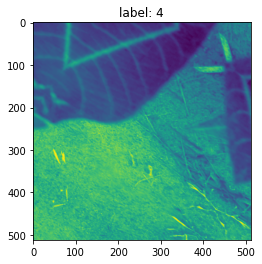

In [23]:
train_dataset = TrainDataset(train, transform=get_transforms(data='train'))

for i in range(1):
    image, label = train_dataset[i]
    plt.imshow(image[0])
    plt.title(f'label: {label}')
    plt.show() 

# Bi-tempered logistic loss

In [24]:
def log_t(u, t):
    """Compute log_t for `u'."""
    if t==1.0:
        return u.log()
    else:
        return (u.pow(1.0 - t) - 1.0) / (1.0 - t)

def exp_t(u, t):
    """Compute exp_t for `u'."""
    if t==1:
        return u.exp()
    else:
        return (1.0 + (1.0-t)*u).relu().pow(1.0 / (1.0 - t))

def compute_normalization_fixed_point(activations, t, num_iters):

    """Returns the normalization value for each example (t > 1.0).
    Args:
      activations: A multi-dimensional tensor with last dimension `num_classes`.
      t: Temperature 2 (> 1.0 for tail heaviness).
      num_iters: Number of iterations to run the method.
    Return: A tensor of same shape as activation with the last dimension being 1.
    """
    mu, _ = torch.max(activations, -1, keepdim=True)
    normalized_activations_step_0 = activations - mu

    normalized_activations = normalized_activations_step_0

    for _ in range(num_iters):
        logt_partition = torch.sum(
                exp_t(normalized_activations, t), -1, keepdim=True)
        normalized_activations = normalized_activations_step_0 * \
                logt_partition.pow(1.0-t)

    logt_partition = torch.sum(
            exp_t(normalized_activations, t), -1, keepdim=True)
    normalization_constants = - log_t(1.0 / logt_partition, t) + mu

    return normalization_constants

def compute_normalization_binary_search(activations, t, num_iters):

    """Returns the normalization value for each example (t < 1.0).
    Args:
      activations: A multi-dimensional tensor with last dimension `num_classes`.
      t: Temperature 2 (< 1.0 for finite support).
      num_iters: Number of iterations to run the method.
    Return: A tensor of same rank as activation with the last dimension being 1.
    """

    mu, _ = torch.max(activations, -1, keepdim=True)
    normalized_activations = activations - mu

    effective_dim = \
        torch.sum(
                (normalized_activations > -1.0 / (1.0-t)).to(torch.int32),
            dim=-1, keepdim=True).to(activations.dtype)

    shape_partition = activations.shape[:-1] + (1,)
    lower = torch.zeros(shape_partition, dtype=activations.dtype, device=activations.device)
    upper = -log_t(1.0/effective_dim, t) * torch.ones_like(lower)

    for _ in range(num_iters):
        logt_partition = (upper + lower)/2.0
        sum_probs = torch.sum(
                exp_t(normalized_activations - logt_partition, t),
                dim=-1, keepdim=True)
        update = (sum_probs < 1.0).to(activations.dtype)
        lower = torch.reshape(
                lower * update + (1.0-update) * logt_partition,
                shape_partition)
        upper = torch.reshape(
                upper * (1.0 - update) + update * logt_partition,
                shape_partition)

    logt_partition = (upper + lower)/2.0
    return logt_partition + mu

class ComputeNormalization(torch.autograd.Function):
    """
    Class implementing custom backward pass for compute_normalization. See compute_normalization.
    """
    @staticmethod
    def forward(ctx, activations, t, num_iters):
        if t < 1.0:
            normalization_constants = compute_normalization_binary_search(activations, t, num_iters)
        else:
            normalization_constants = compute_normalization_fixed_point(activations, t, num_iters)

        ctx.save_for_backward(activations, normalization_constants)
        ctx.t=t
        return normalization_constants

    @staticmethod
    def backward(ctx, grad_output):
        activations, normalization_constants = ctx.saved_tensors
        t = ctx.t
        normalized_activations = activations - normalization_constants 
        probabilities = exp_t(normalized_activations, t)
        escorts = probabilities.pow(t)
        escorts = escorts / escorts.sum(dim=-1, keepdim=True)
        grad_input = escorts * grad_output
        
        return grad_input, None, None

def compute_normalization(activations, t, num_iters=5):
    """Returns the normalization value for each example. 
    Backward pass is implemented.
    Args:
      activations: A multi-dimensional tensor with last dimension `num_classes`.
      t: Temperature 2 (> 1.0 for tail heaviness, < 1.0 for finite support).
      num_iters: Number of iterations to run the method.
    Return: A tensor of same rank as activation with the last dimension being 1.
    """
    return ComputeNormalization.apply(activations, t, num_iters)

def tempered_sigmoid(activations, t, num_iters = 5):
    """Tempered sigmoid function.
    Args:
      activations: Activations for the positive class for binary classification.
      t: Temperature tensor > 0.0.
      num_iters: Number of iterations to run the method.
    Returns:
      A probabilities tensor.
    """
    internal_activations = torch.stack([activations,
        torch.zeros_like(activations)],
        dim=-1)
    internal_probabilities = tempered_softmax(internal_activations, t, num_iters)
    return internal_probabilities[..., 0]


def tempered_softmax(activations, t, num_iters=5):
    """Tempered softmax function.
    Args:
      activations: A multi-dimensional tensor with last dimension `num_classes`.
      t: Temperature > 1.0.
      num_iters: Number of iterations to run the method.
    Returns:
      A probabilities tensor.
    """
    if t == 1.0:
        return activations.softmax(dim=-1)

    normalization_constants = compute_normalization(activations, t, num_iters)
    return exp_t(activations - normalization_constants, t)

def bi_tempered_binary_logistic_loss(activations,
        labels,
        t1,
        t2,
        label_smoothing = 0.0,
        num_iters=5,
        reduction='mean'):

    """Bi-Tempered binary logistic loss.
    Args:
      activations: A tensor containing activations for class 1.
      labels: A tensor with shape as activations, containing probabilities for class 1
      t1: Temperature 1 (< 1.0 for boundedness).
      t2: Temperature 2 (> 1.0 for tail heaviness, < 1.0 for finite support).
      label_smoothing: Label smoothing
      num_iters: Number of iterations to run the method.
    Returns:
      A loss tensor.
    """
    internal_activations = torch.stack([activations,
        torch.zeros_like(activations)],
        dim=-1)
    internal_labels = torch.stack([labels.to(activations.dtype),
        1.0 - labels.to(activations.dtype)],
        dim=-1)
    return bi_tempered_logistic_loss(internal_activations, 
            internal_labels,
            t1,
            t2,
            label_smoothing = label_smoothing,
            num_iters = num_iters,
            reduction = reduction)

def bi_tempered_logistic_loss(activations,
        labels,
        t1,
        t2,
        label_smoothing=0.0,
        num_iters=5,
        reduction = 'mean'):

    """Bi-Tempered Logistic Loss.
    Args:
      activations: A multi-dimensional tensor with last dimension `num_classes`.
      labels: A tensor with shape and dtype as activations (onehot), 
        or a long tensor of one dimension less than activations (pytorch standard)
      t1: Temperature 1 (< 1.0 for boundedness).
      t2: Temperature 2 (> 1.0 for tail heaviness, < 1.0 for finite support).
      label_smoothing: Label smoothing parameter between [0, 1). Default 0.0.
      num_iters: Number of iterations to run the method. Default 5.
      reduction: ``'none'`` | ``'mean'`` | ``'sum'``. Default ``'mean'``.
        ``'none'``: No reduction is applied, return shape is shape of
        activations without the last dimension.
        ``'mean'``: Loss is averaged over minibatch. Return shape (1,)
        ``'sum'``: Loss is summed over minibatch. Return shape (1,)
    Returns:
      A loss tensor.
    """

    if len(labels.shape)<len(activations.shape): #not one-hot
        labels_onehot = torch.zeros_like(activations)
        labels_onehot.scatter_(1, labels[..., None], 1)
    else:
        labels_onehot = labels

    if label_smoothing > 0:
        num_classes = labels_onehot.shape[-1]
        labels_onehot = ( 1 - label_smoothing * num_classes / (num_classes - 1) ) \
                * labels_onehot + \
                label_smoothing / (num_classes - 1)

    probabilities = tempered_softmax(activations, t2, num_iters)

    loss_values = labels_onehot * log_t(labels_onehot + 1e-10, t1) \
            - labels_onehot * log_t(probabilities, t1) \
            - labels_onehot.pow(2.0 - t1) / (2.0 - t1) \
            + probabilities.pow(2.0 - t1) / (2.0 - t1)
    loss_values = loss_values.sum(dim = -1) #sum over classes

    if reduction == 'none':
        return loss_values
    if reduction == 'sum':
        return loss_values.sum()
    if reduction == 'mean':
        return loss_values.mean()

# MODEL

In [25]:
# ====================================================
# MODEL
# ====================================================
class CustomModel(nn.Module):
    def __init__(self, model_name, pretrained=False):
        super().__init__()
        self.model = timm.create_model(model_name, pretrained=pretrained)
        if hasattr(self.model, 'classifier'):
            n_features = self.model.classifier.in_features
            self.model.classifier = nn.Linear(n_features, CFG['target_size'])
        elif hasattr(self.model, 'fc'):
            n_features = self.model.fc.in_features
            self.model.fc = nn.Linear(n_features, CFG['target_size'])

    def forward(self, x):
        x = self.model(x)
        return x

In [26]:
model = CustomModel(model_name=TAG['model_name'], pretrained=False)
train_dataset = TrainDataset(train, transform=get_transforms(data='train'))
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True,
                          num_workers=4, pin_memory=True, drop_last=True)

for image, label in train_loader:
    output = model(image)
    print(output)
    break

tensor([[ 0.2182,  0.0301, -0.0108,  0.5042,  0.1394],
        [ 0.0699,  0.0761,  0.0454,  0.4495,  0.0220],
        [ 0.0141,  0.0889,  0.1173,  0.4474, -0.1270],
        [ 0.1734,  0.0101,  0.0752,  0.4199,  0.1033]],
       grad_fn=<AddmmBackward>)


# Helper functions

In [27]:
# ====================================================
# Helper functions
# ====================================================
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (remain %s)' % (asMinutes(s), asMinutes(rs))




In [28]:
# ====================================================
# loss
# ====================================================
def get_loss(criterion, y_preds, labels):
    if TAG['criterion']=='CrossEntropyLoss':
        loss = criterion(y_preds, labels)
    elif TAG['criterion'] == 'bi_tempered_logistic_loss':
        loss = criterion(y_preds, labels, t1=CFG['bi_tempered_loss_t1'], t2=CFG['bi_tempered_loss_t2'])
    return loss

In [29]:
# ====================================================
# Helper functions
# ====================================================
def train_fn(train_loader, model, criterion, optimizer, epoch, scheduler, device):
    batch_time = AverageMeter()
    data_time = AverageMeter()
    losses = AverageMeter()
    scores = AverageMeter()
    # switch to train mode
    model.train()
    start = end = time.time()
    global_step = 0
    for step, (images, labels) in enumerate(train_loader):
        # measure data loading time
        data_time.update(time.time() - end)
        images = images.to(device)
        labels = labels.to(device)
        batch_size = labels.size(0)
        y_preds = model(images)
        loss = get_loss(criterion, y_preds, labels)
        # record loss
        losses.update(loss.item(), batch_size)
        if CFG['gradient_accumulation_steps'] > 1:
            loss = loss / CFG['gradient_accumulation_steps']
        if CFG['apex']:
            with amp.scale_loss(loss, optimizer) as scaled_loss:
                scaled_loss.backward()
        else:
            loss.backward()
        grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(), CFG['max_grad_norm'])
        if (step + 1) % CFG['gradient_accumulation_steps'] == 0:
            if os.environ['COLAB_TPU_ADDR']:
                xm.optimizer_step(optimizer)
            else:
                optimizer.step()
            optimizer.zero_grad()
            global_step += 1
        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()
        if step % CFG['print_freq'] == 0 or step == (len(train_loader)-1):
            print('Epoch: [{0}][{1}/{2}] '
                  'Data {data_time.val:.3f} ({data_time.avg:.3f}) '
                  'Elapsed {remain:s} '
                  'Loss: {loss.val:.4f}({loss.avg:.4f}) '
                  'Grad: {grad_norm:.4f}  '
                  #'LR: {lr:.6f}  '
                  .format(
                   epoch+1, step, len(train_loader), batch_time=batch_time,
                   data_time=data_time, loss=losses,
                   remain=timeSince(start, float(step+1)/len(train_loader)),
                   grad_norm=grad_norm,
                   #lr=scheduler.get_lr()[0],
                   ))
    return losses.avg


def valid_fn(valid_loader, model, criterion, device):
    batch_time = AverageMeter()
    data_time = AverageMeter()
    losses = AverageMeter()
    scores = AverageMeter()
    # switch to evaluation mode
    model.eval()
    preds = []
    start = end = time.time()
    for step, (images, labels) in enumerate(valid_loader):
        # measure data loading time
        data_time.update(time.time() - end)
        images = images.to(device)
        labels = labels.to(device)
        batch_size = labels.size(0)
        # compute loss
        with torch.no_grad():
            y_preds = model(images)
        loss = get_loss(criterion, y_preds, labels)
        losses.update(loss.item(), batch_size)
        # record accuracy
        preds.append(y_preds.softmax(1).to('cpu').numpy())
        if CFG['gradient_accumulation_steps'] > 1:
            loss = loss / CFG['gradient_accumulation_steps']
        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()
        if step % CFG['print_freq'] == 0 or step == (len(valid_loader)-1):
            print('EVAL: [{0}/{1}] '
                  'Data {data_time.val:.3f} ({data_time.avg:.3f}) '
                  'Elapsed {remain:s} '
                  'Loss: {loss.val:.4f}({loss.avg:.4f}) '
                  .format(
                   step, len(valid_loader), batch_time=batch_time,
                   data_time=data_time, loss=losses,
                   remain=timeSince(start, float(step+1)/len(valid_loader)),
                   ))
    predictions = np.concatenate(preds)
    return losses.avg, predictions


def inference(model, states, test_loader, device):
    model.to(device)
    tk0 = tqdm(enumerate(test_loader), total=len(test_loader))
    probs = []
    for i, (images) in tk0:
        images = images.to(device)
        avg_preds = []
        for state in states:
            # model.load_state_dict(state['model'])
            model.load_state_dict(state)
            model.eval()
            with torch.no_grad():
                y_preds = model(images)
            avg_preds.append(y_preds.softmax(1).to('cpu').numpy())
        avg_preds = np.mean(avg_preds, axis=0)
        probs.append(avg_preds)
    probs = np.concatenate(probs)
    return probs

# Train loop

In [30]:
# ====================================================
# scheduler 
# ====================================================
def get_scheduler(optimizer):
    if TAG['scheduler']=='ReduceLROnPlateau':
        scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=CFG['factor'], patience=CFG['patience'], verbose=True, eps=CFG['eps'])
    elif TAG['scheduler']=='CosineAnnealingLR':
        scheduler = CosineAnnealingLR(optimizer, T_max=CFG['T_max'], eta_min=CFG['min_lr'], last_epoch=-1)
    elif TAG['scheduler']=='CosineAnnealingWarmRestarts':
        scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=CFG['T_0'], T_mult=1, eta_min=CFG['min_lr'], last_epoch=-1)
    return scheduler

# ====================================================
# criterion
# ====================================================
def get_criterion():
    if TAG['criterion']=='CrossEntropyLoss':
        criterion = nn.CrossEntropyLoss()
    elif TAG['criterion'] == 'bi_tempered_logistic_loss':
        criterion = bi_tempered_logistic_loss
    return criterion

In [31]:
# ====================================================
# Train loop
# ====================================================
def train_loop(folds, fold):

    if not CFG['debug']:
        mlflow.set_tag('running.fold', str(fold))
    # ====================================================
    # loader
    # ====================================================
    trn_idx = folds[folds['fold'] != fold].index
    val_idx = folds[folds['fold'] == fold].index

    train_folds = folds.loc[trn_idx].reset_index(drop=True)
    valid_folds = folds.loc[val_idx].reset_index(drop=True)

    train_dataset = TrainDataset(train_folds, 
                                 transform=get_transforms(data='train'))
    valid_dataset = TrainDataset(valid_folds, 
                                 transform=get_transforms(data='valid'))
    if os.environ['COLAB_TPU_ADDR']:
        # special sampler needed for distributed/multi-core (divides dataset among the replicas/cores/devices)
        train_sampler = torch.utils.data.distributed.DistributedSampler(
            train_dataset,
            num_replicas=xm.xrt_world_size(), #divide dataset among this many replicas
            rank=xm.get_ordinal(), #which replica/device/core
            shuffle=True)
        
        # define DataLoader with the defined sampler
        train_loader_ = torch.utils.data.DataLoader(
            train_dataset,
            batch_size=CFG['batch_size'],
            sampler=train_sampler,
            num_workers=CFG['num_workers'],
            drop_last=True)
        
        # same as train but with valid data
        valid_sampler = torch.utils.data.distributed.DistributedSampler(
            valid_dataset,
            num_replicas=xm.xrt_world_size(),
            rank=xm.get_ordinal(),
            shuffle=False)

        valid_loader_ = torch.utils.data.DataLoader(
            valid_dataset,
            batch_size=CFG['batch_size'],
            sampler=valid_sampler,
            num_workers=CFG['num_workers'],
            drop_last=False)
    else:
        train_loader = DataLoader(train_dataset, 
                                batch_size=CFG['batch_size'], 
                                shuffle=True, 
                                num_workers=CFG['num_workers'], pin_memory=True, drop_last=True)
        valid_loader = DataLoader(valid_dataset, 
                                batch_size=CFG['batch_size'], 
                                shuffle=False, 
                                num_workers=CFG['num_workers'], pin_memory=True, drop_last=False)

    # ====================================================
    # model & optimizer & criterion
    # ====================================================
    best_model_path = OUTPUT_DIR+f'{TAG["model_name"]}_fold{fold}_best.pth'
    latest_model_path = OUTPUT_DIR+f'{TAG["model_name"]}_fold{fold}_latest.pth'

    if os.environ['COLAB_TPU_ADDR']:
        MX = xmp.MpModelWrapper(CustomModel(TAG['model_name'], pretrained=True))
        model = MX.to(device)
    else:
        model = CustomModel(TAG['model_name'], pretrained=True)
        model.to(device)
    # 学習途中の重みがあれば読み込み
    if os.path.isfile(latest_model_path):
        state_latest = torch.load(latest_model_path)
        state_best = torch.load(best_model_path)
        model.load_state_dict(state_latest['model'])
        epoch_start = state_latest['epoch']+1
        # er_best_score = state_latest['score']
        er_counter = state_latest['counter']
        er_best_score = state_best['best_score']

        LOGGER.info(f'Retrain model in epoch:{epoch_start}, best_score:{er_best_score:.3f}, counter:{er_counter}')
    else:
        epoch_start = 0
        er_best_score = None
        er_counter = 0

    if os.environ['COLAB_TPU_ADDR']:
        optimizer = Adam(model.parameters(), lr=CFG['lr']*xm.xrt_world_size(), weight_decay=CFG['weight_decay'], amsgrad=False)
    else:
        optimizer = Adam(model.parameters(), lr=CFG['lr'], weight_decay=CFG['weight_decay'], amsgrad=False)
    scheduler = get_scheduler(optimizer)
    criterion = get_criterion()

    # ====================================================
    # apex
    # ====================================================
    if CFG['apex']:
        model, optimizer = amp.initialize(model, optimizer, opt_level='O1', verbosity=0)

    # ====================================================
    # loop
    # ====================================================
    # best_score = 0.
    # best_loss = np.inf
    early_stopping = EarlyStopping(
                            patience=CFG['early_stopping_round'], 
                            verbose=True,
                            save_path=best_model_path,
                            counter=er_counter, best_score=er_best_score, 
                            save_latest_path=latest_model_path)
    
    for epoch in range(epoch_start, CFG['epochs']):
        
        start_time = time.time()
        
        # train
        if os.environ['COLAB_TPU_ADDR']:
            train_loader = pl.MpDeviceLoader(train_loader_, device)
        avg_loss = train_fn(train_loader, model, criterion, optimizer, epoch, scheduler, device)
        if os.environ['COLAB_TPU_ADDR']:
            del train_loader; gc.collect()

        # eval
        if os.environ['COLAB_TPU_ADDR']:
            valid_loader = pl.MpDeviceLoader(valid_loader_, device)
        avg_val_loss, preds = valid_fn(valid_loader, model, criterion, device)
        valid_labels = valid_folds[CFG['target_col']].values
        if os.environ['COLAB_TPU_ADDR']:
            del valid_loader; gc.collect()
        
        # early stopping
        early_stopping(avg_val_loss, model, preds, epoch)
        if early_stopping.early_stop:
            print(f'Epoch {epoch+1} - early stopping')
            break
        
        if isinstance(scheduler, ReduceLROnPlateau):
            scheduler.step(avg_val_loss)
        elif isinstance(scheduler, CosineAnnealingLR):
            scheduler.step()
        elif isinstance(scheduler, CosineAnnealingWarmRestarts):
            scheduler.step()

        # scoring
        score = get_score(valid_labels, preds.argmax(1))

        elapsed = time.time() - start_time

        LOGGER.info(f'Epoch {epoch+1} - avg_train_loss: {avg_loss:.4f}  avg_val_loss: {avg_val_loss:.4f}  time: {elapsed:.0f}s')
        LOGGER.info(f'Epoch {epoch+1} - Accuracy: {score}')
        
        # log mlflow
        if not CFG['debug']:
            mlflow.log_metric(f"fold{fold} avg_train_loss", avg_loss, step=epoch)
            mlflow.log_metric(f"fold{fold} avg_valid_loss", avg_val_loss, step=epoch)
            mlflow.log_metric(f"fold{fold} score", score, step=epoch)
            mlflow.log_metric(f"fold{fold} lr", scheduler.get_last_lr()[0], step=epoch)
            mlflow.log_artifact(best_model_path)
            if os.path.isfile(latest_model_path):
                mlflow.log_artifact(latest_model_path)
    
    check_point = torch.load(best_model_path)
    valid_folds[[str(c) for c in range(5)]] = check_point['preds']
    valid_folds['preds'] = check_point['preds'].argmax(1)

    return valid_folds

In [38]:
def _mp_fn(index, folds, fold):
    torch.set_default_tensor_type('torch.FloatTensor')
    _oof_df = train_loop(folds, fold)

    return _oof_df

In [40]:
# ====================================================
# main
# ====================================================
def get_result(result_df):
    preds = result_df['preds'].values
    labels = result_df[CFG['target_col']].values
    score = get_score(labels, preds)
    LOGGER.info(f'Score: {score:<.5f}')
    
    return score

    

def main():

    """
    Prepare: 1.train  2.test  3.submission  4.folds
    """
    
    if CFG['train']:
        # train 
        oof_df = pd.DataFrame()
        for fold in range(CFG['n_fold']):
            if fold in CFG['trn_fold']:
                LOGGER.info(f"========== fold: {fold} training ==========")
                if os.environ['COLAB_TPU_ADDR']:
                    _oof_df = xmp.spawn(_mp_fn, args=(folds, fold,), nprocs=8, start_method='fork')
                else:
                    _oof_df = train_loop(folds, fold)
                oof_df = pd.concat([oof_df, _oof_df])
                LOGGER.info(f"========== fold: {fold} result ==========")
                _ = get_result(_oof_df)
        # CV result
        LOGGER.info(f"========== CV ==========")
        score = get_result(oof_df)
        # save result
        oof_df.to_csv(OUTPUT_DIR+'oof_df.csv', index=False)
        # log mlflow
        if not CFG['debug']:
            mlflow.log_metric('oof score', score)
            mlflow.delete_tag('running.fold')
            mlflow.log_artifact(OUTPUT_DIR+'oof_df.csv')
    
    if CFG['inference']:
        # inference
        model = CustomModel(TAG['model_name'], pretrained=False)
        states = [torch.load(OUTPUT_DIR+f'{TAG["model_name"]}_fold{fold}_best.pth') for fold in CFG['trn_fold']]
        test_dataset = TestDataset(test, transform=get_transforms(data='valid'))
        test_loader = DataLoader(test_dataset, batch_size=CFG['batch_size'], shuffle=False, 
                                 num_workers=CFG['num_workers'], pin_memory=True)
        predictions = inference(model, states, test_loader, device)
        # submission
        test['label'] = predictions.argmax(1)
        test[['image_id', 'label']].to_csv(OUTPUT_DIR+'submission.csv', index=False)

In [41]:
# def _mp_fn(index):
#     torch.set_default_tensor_type('torch.FloatTensor')
#     main()

# rerun

In [42]:
def _load_save_point(run_id):
    # どこで中断したか取得
    stop_fold = int(mlflow.get_run(run_id=run_id).to_dictionary()['data']['tags']['running.fold'])
    # 学習対象のfoldを変更
    CFG['trn_fold'] = [fold for fold in CFG['trn_fold'] if fold>=stop_fold]
    # 学習済みモデルがあれば.pthファイルを取得(学習中も含む)
    client = mlflow.tracking.MlflowClient()
    artifacts = [artifact for artifact in client.list_artifacts(run_id) if ".pth" in artifact.path]
    for artifact in artifacts:
        client.download_artifacts(run_id, artifact.path, OUTPUT_DIR)


def check_have_run():
    results = mlflow.search_runs(INFO['EXPERIMENT_ID'])
    run_id_list = results[results['tags.mlflow.runName']==TITLE]['run_id'].tolist()
    # 初めて実行する場合
    if len(run_id_list) == 0:
        run_id = None
    # 既に実行されている場合
    else:
        assert len(run_id_list)==1
        run_id = run_id_list[0]
        _load_save_point(run_id)

    return run_id

In [44]:
if __name__ == '__main__':
    if CFG['debug']:
        # if os.environ['COLAB_TPU_ADDR']:
        #     xmp.spawn(_mp_fn, args=(), nprocs=8, start_method='fork')
        # else:
        #     main()
        main()
    else:
        mlflow.set_tracking_uri(INFO['TRACKING_URI'])
        mlflow.set_experiment('single model')
        # 既に実行済みの場合は続きから実行する
        run_id = check_have_run()
        with mlflow.start_run(run_id=run_id, run_name=TITLE):
            if run_id is None:
                mlflow.log_artifact(CONFIG_PATH)
                mlflow.log_param('device', device)
                mlflow.set_tags(TAG)
                mlflow.log_params(CFG)
            mlflow.log_artifact(notebook_path)
            # if os.environ['COLAB_TPU_ADDR']:
            #     xmp.spawn(_mp_fn, args=(), nprocs=8, start_method='fork')
            # else:
            #     main()
            main()
            mlflow.log_artifacts(OUTPUT_DIR)
            shutil.copytree(OUTPUT_DIR, f'{INFO["SHARE_DRIVE_PATH"]}/{TITLE}')
            shutil.copy2(CONFIG_PATH, f'{INFO["SHARE_DRIVE_PATH"]}/{TITLE}/{CONFIG_NAME}')

========== fold: 0 training ==========
INFO:__main__:========== fold: 0 training ==========
========== fold: 0 training ==========
INFO:__main__:========== fold: 0 training ==========
========== fold: 0 training ==========
INFO:__main__:========== fold: 0 training ==========
========== fold: 0 training ==========
INFO:__main__:========== fold: 0 training ==========
========== fold: 0 training ==========
INFO:__main__:========== fold: 0 training ==========
========== fold: 0 training ==========
INFO:__main__:========== fold: 0 training ==========
========== fold: 0 training ==========
INFO:__main__:========== fold: 0 training ==========
========== fold: 0 training ==========
INFO:__main__:========== fold: 0 training ==========
Exception in thread Thread-7:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File 

KeyboardInterrupt: ignored